# prepare

In [ ]:
#Khai báo các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
def calculate_mape(actual, predicted):
    if len(actual) != len(predicted):
        raise ValueError("Actual and predicted lists must have the same length.")

    absolute_errors = []
    for i in range(len(actual)):
        absolute_errors.append(abs(actual[i] - predicted[i]))

    percentage_errors = []
    for i in range(len(actual)):
        if actual[i] != 0:
            percentage_errors.append(absolute_errors[i] / actual[i] * 100)

    return sum(percentage_errors) / len(percentage_errors)

import math

def calculate_rmse(actual, predicted):
    if len(actual) != len(predicted):
        raise ValueError("Actual and predicted lists must have the same length.")

    squared_errors = [(actual[i] - predicted[i])**2 for i in range(len(actual))]
    mean_squared_error = sum(squared_errors) / len(actual)
    rmse = math.sqrt(mean_squared_error)

    return rmse

In [ ]:
# Load data
df = pd.read_csv('BIDV_BID.csv',
                 header=0,
                 index_col='Date',
                 parse_dates=True).asfreq("D")
df.dropna(subset=['Close', 'Open', 'High'], inplace=True) #bỏ các dòng dlieu NULL do set Date thành index
df.head(10)

<ipython-input-3-4ea4a2287720>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('BIDV_BID.csv',


,Close,Open,High,Low,Vol
Date,,,,,
2017-01-03,12088.7,12199.9,12199.9,11940.4,3740000.0
2017-01-06,13572.0,13720.3,13831.6,13572.0,4000000.0
2017-01-08,16464.4,16316.0,16575.6,16167.7,4470000.0
2017-01-09,16110.5,16148.7,16531.4,15880.9,4750000.0
2017-01-11,17143.7,16722.8,17182.0,16722.8,3190000.0
2017-01-12,19516.3,19592.8,19631.1,19439.7,1650000.0
2017-01-13,12051.6,12237.0,12274.1,11977.5,4290000.0
2017-01-16,11717.9,12051.6,12088.7,11717.9,3450000.0
2017-01-17,12459.5,11940.4,12496.6,11829.1,8220000.0


In [ ]:
df.dropna(subset=['Close', 'Open', 'High'], inplace=True) #bỏ các dòng dlieu NULL do set Date thành index
df.head(10)

,Close,Open,High,Low,Vol
Date,,,,,
2017-01-03,12088.7,12199.9,12199.9,11940.4,3740000.0
2017-01-06,13572.0,13720.3,13831.6,13572.0,4000000.0
2017-01-08,16464.4,16316.0,16575.6,16167.7,4470000.0
2017-01-09,16110.5,16148.7,16531.4,15880.9,4750000.0
2017-01-11,17143.7,16722.8,17182.0,16722.8,3190000.0
2017-01-12,19516.3,19592.8,19631.1,19439.7,1650000.0
2017-01-13,12051.6,12237.0,12274.1,11977.5,4290000.0
2017-01-16,11717.9,12051.6,12088.7,11717.9,3450000.0
2017-01-17,12459.5,11940.4,12496.6,11829.1,8220000.0


In [ ]:
df.isnull().sum()

Close    0
Open     0
High     0
Low      0
Vol      0
dtype: int64

<Axes: title={'center': 'Price Data'}, xlabel='Date'>

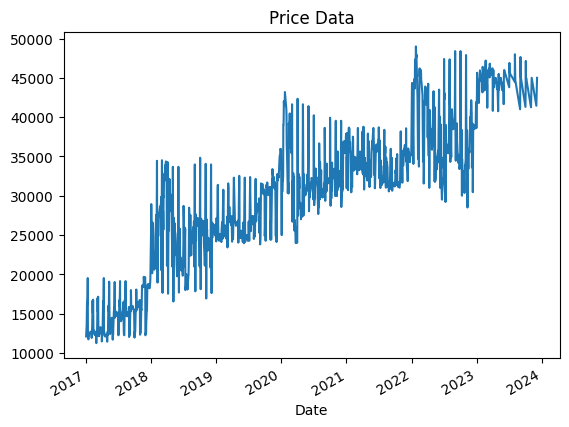

In [ ]:
#Lấy data 'Price' để xử lý
data = df['Close']
data.sort_index(inplace=True)
data.plot(title='Price Data')

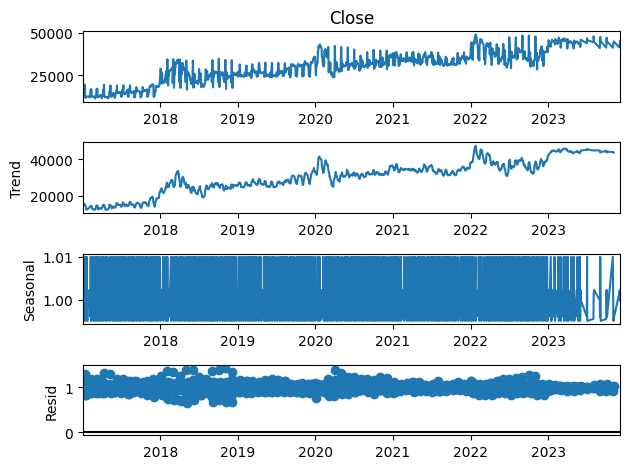

In [ ]:
decompose_result = seasonal_decompose(df['Close'], model = 'mul', period = 7)
decompose_result.plot();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


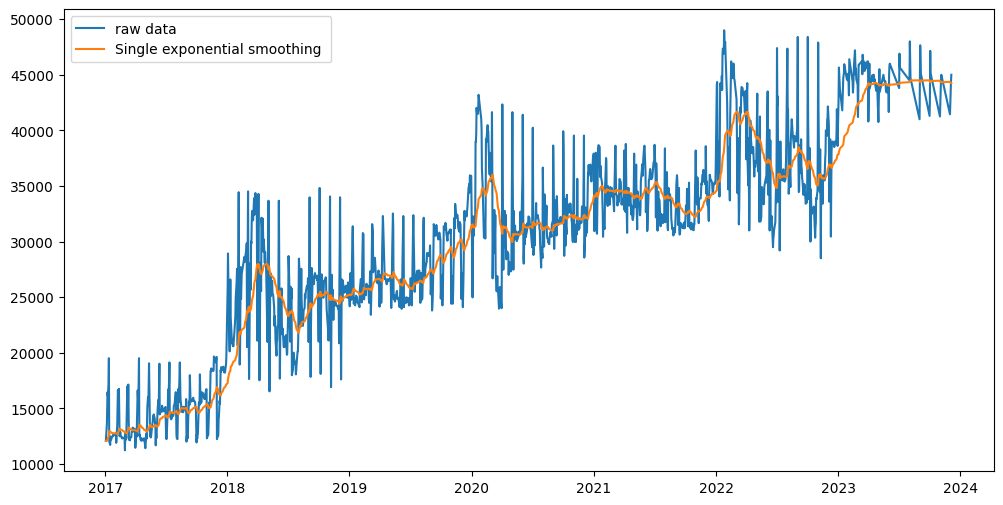

In [ ]:
#Áp dụng Single exponential smoothing
x = 12
alpha = 1/(2*x)
HWES1 = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
fig, ax = plt.subplots(1,figsize=(12, 6))
ax.plot(data.index, data, label='raw data')
ax.plot(HWES1.index, HWES1, label='Single exponential smoothing ');
ax.legend()

#BIDV 8:2


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 46.92574013790338
RMSE: 21769.933491393294


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

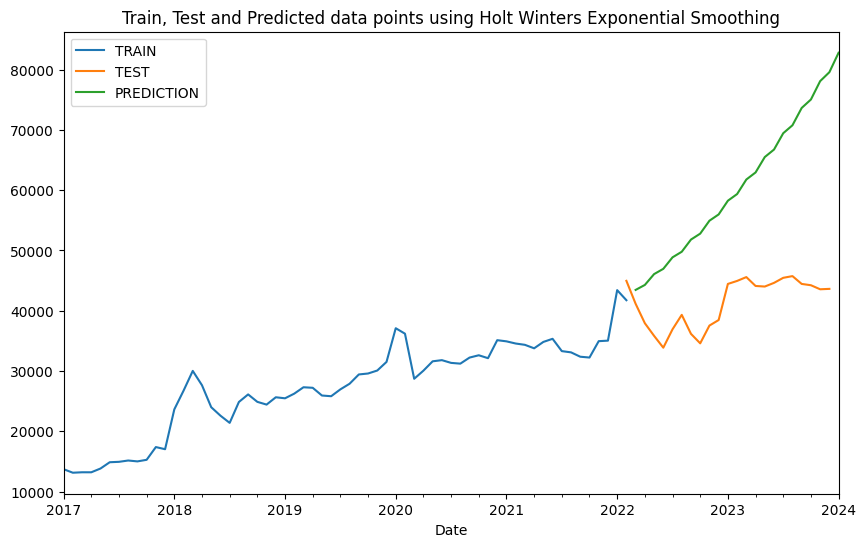

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#BIDV 7:3


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.7*len(data))]
test = data[int(0.7*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 46.22494791253694
RMSE: 22432.333543836437


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

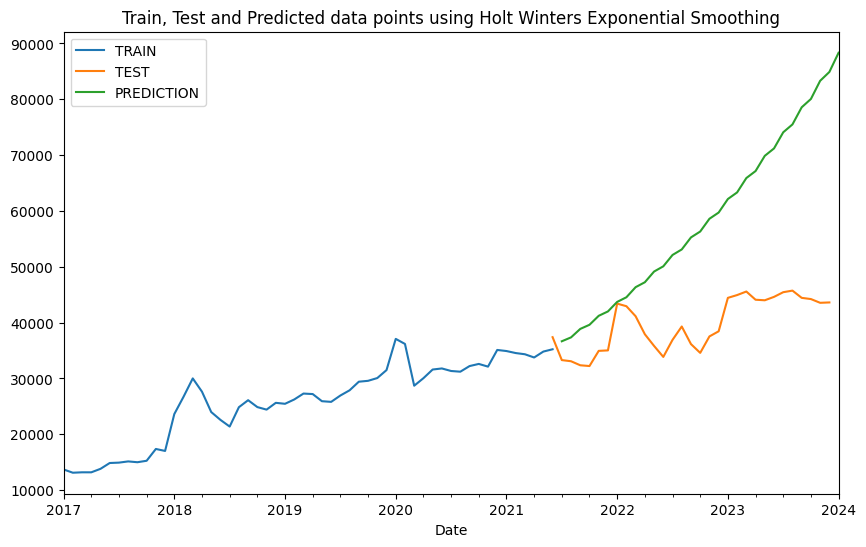

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#BIDV 9:1


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.9*len(data))]
test = data[int(0.9*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 22.452386821489558
RMSE: 11027.657458864564


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

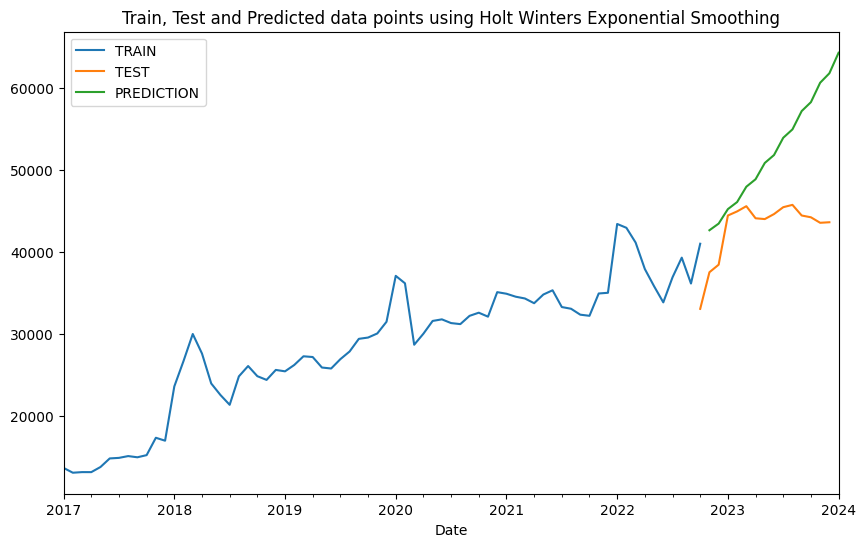

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#BIDV 8:2


In [ ]:
# Load data
df = pd.read_csv('FPT.csv',
                 header=0,
                 index_col='Date',
                 parse_dates=True).asfreq("D")
df.dropna(subset=['Price', 'Open', 'High'], inplace=True) #bỏ các dòng dlieu NULL do set Date thành index

data = df['Price']
df.head(10)

,Price,Open,High,Low,Vol
Date,,,,,
2017-01-03,16158.2,15960.1,16194.3,15960.1,2340.0
2017-01-04,16302.3,16140.2,16464.5,16104.2,2360.0
2017-01-05,16248.3,16284.3,16356.4,16248.3,1420.0
2017-01-06,16194.3,16284.3,16392.4,16194.3,1850.0
2017-01-09,16284.3,16230.3,16356.4,16176.2,1160.0
2017-01-10,16572.5,16302.3,16572.5,16266.3,2410.0
2017-01-11,16608.6,16680.6,16788.7,16608.6,1710.0
2017-01-12,16554.5,16608.6,16644.6,16518.5,1250.0
2017-01-13,16176.2,16608.6,16716.7,16104.2,3790.0


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 6.636457091706841
RMSE: 6326.392023678354


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

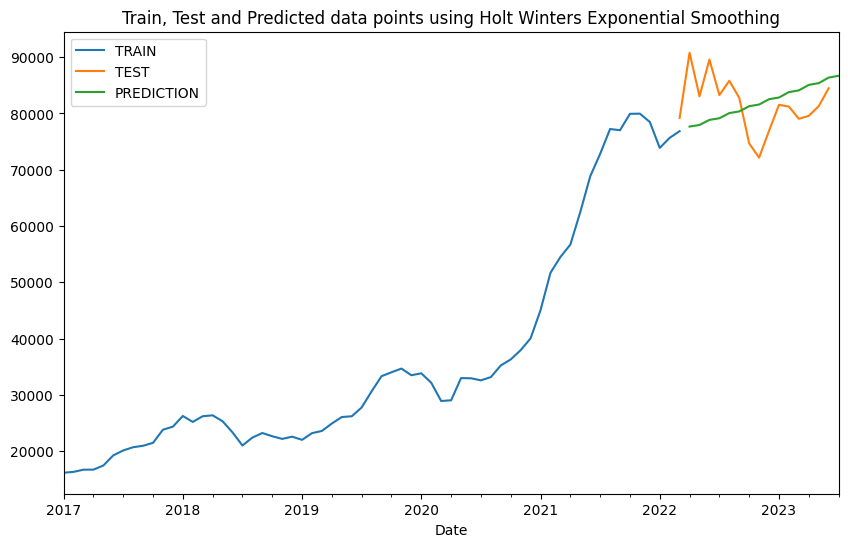

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#BIDV 7:3


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.7*len(data))]
test = data[int(0.7*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 169.37473386751435
RMSE: 174828.8972499999


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

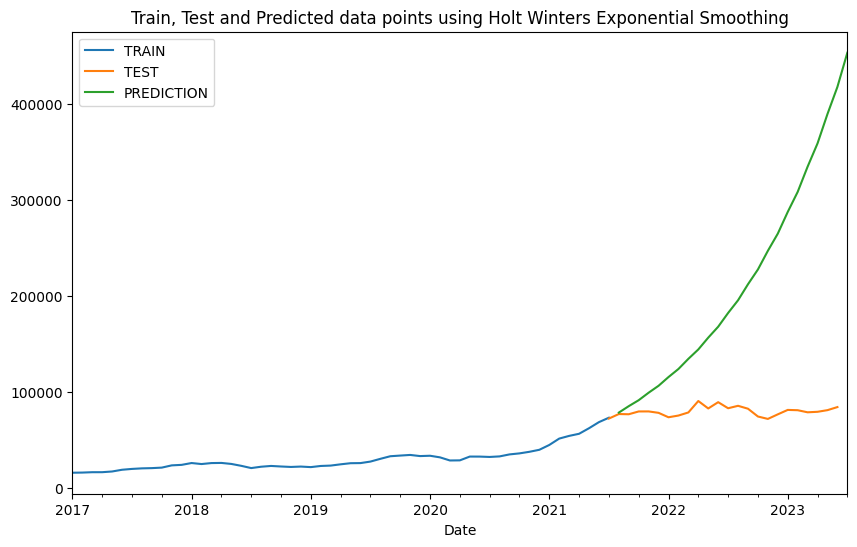

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#BIDV 9:1


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.9*len(data))]
test = data[int(0.9*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 21.434073716571667
RMSE: 19885.50782413647


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

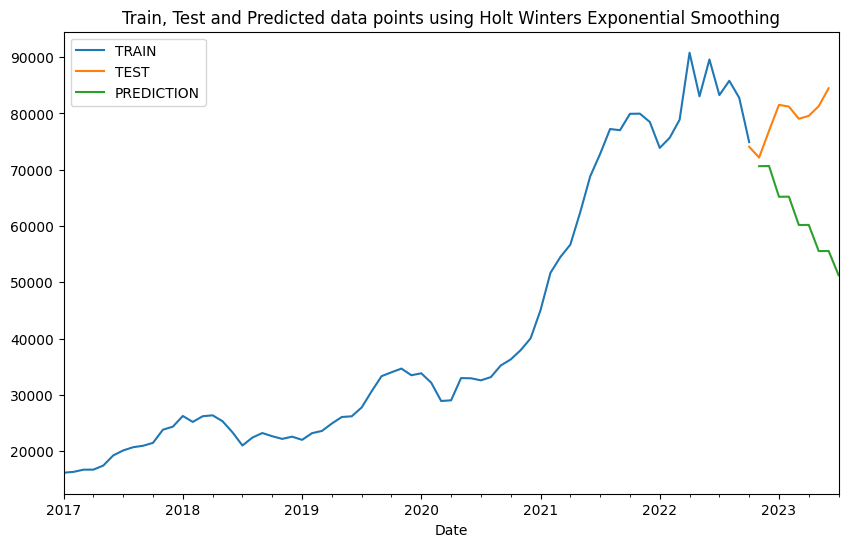

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#VCG 8:2


In [ ]:
# Load data
df = pd.read_csv('VCG.csv',
                 header=0,
                 index_col='Date',
                 parse_dates=True).asfreq("D")
df.dropna(subset=['Price', 'Open', 'High'], inplace=True) #bỏ các dòng dlieu NULL do set Date thành index

data = df['Price']
df.head(10)

,Price,Open,High,Low,Vol
Date,,,,,
2017-01-03,8912.8,8912.8,9043.9,8847.3,917.40
2017-01-04,9175.0,8912.8,9306.1,8912.8,3.04
2017-01-05,9371.6,9240.5,9437.1,9175.0,2.96
2017-01-06,9175.0,9437.1,9437.1,9175.0,1.08
2017-01-09,9240.5,9175.0,9371.6,9175.0,1.23
2017-01-10,9437.1,9240.5,9502.7,9175.0,2.46
2017-01-11,9568.2,9437.1,9633.7,9437.1,1.84
2017-01-12,9371.6,9502.7,9568.2,9371.6,754.42
2017-01-13,9240.5,9437.1,9437.1,9240.5,942.19


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 114.44686757473096
RMSE: 23795.336532793834


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

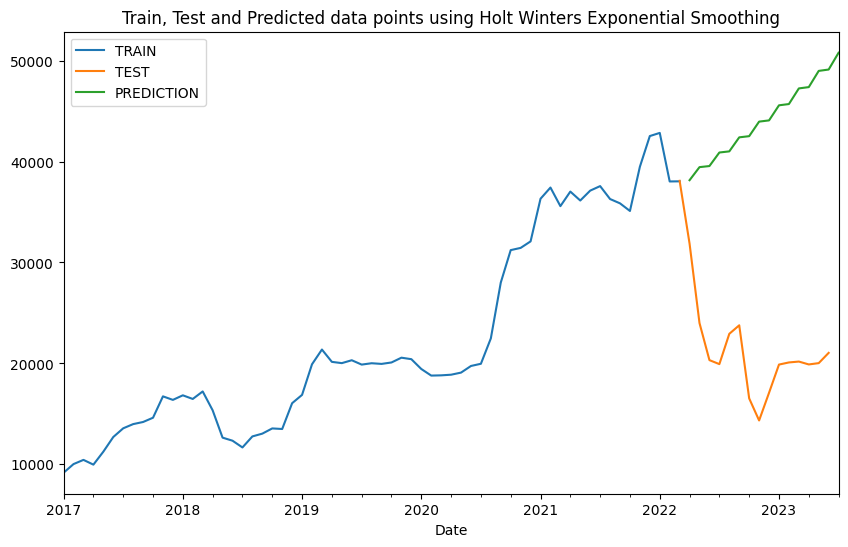

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#VCG 7:3


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.7*len(data))]
test = data[int(0.7*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 153.1057451271816
RMSE: 37842.41609310795


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

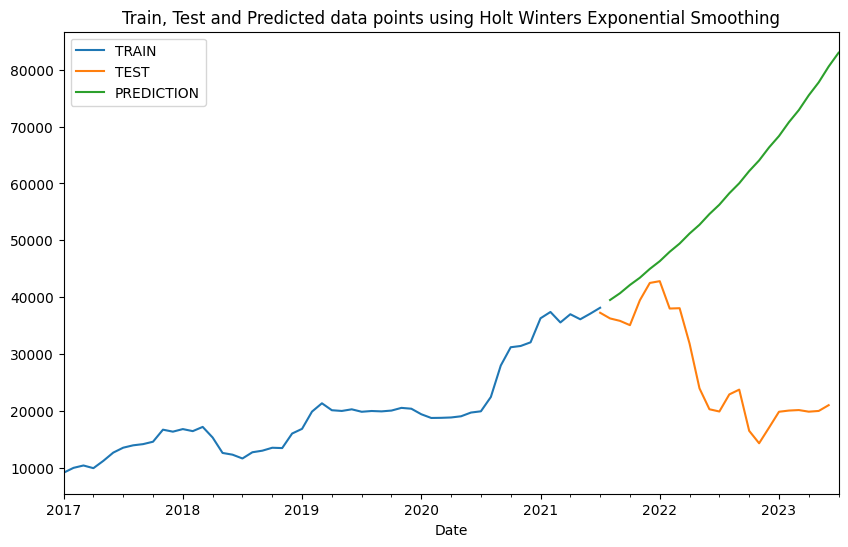

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

#VCG 9:1


In [ ]:
# Chia bộ dữ liệu thành 2 tập train, test và huấn luyện model
train = data[:int(0.9*len(data))]
test = data[int(0.9*len(data)):]
train = train.resample('M').mean()
test = test.resample('M').mean()

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE:', calculate_mape(test, test_predictions))
print('RMSE:', calculate_rmse(test, test_predictions))

MAPE: 37.404460334695564
RMSE: 8606.871551215541


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

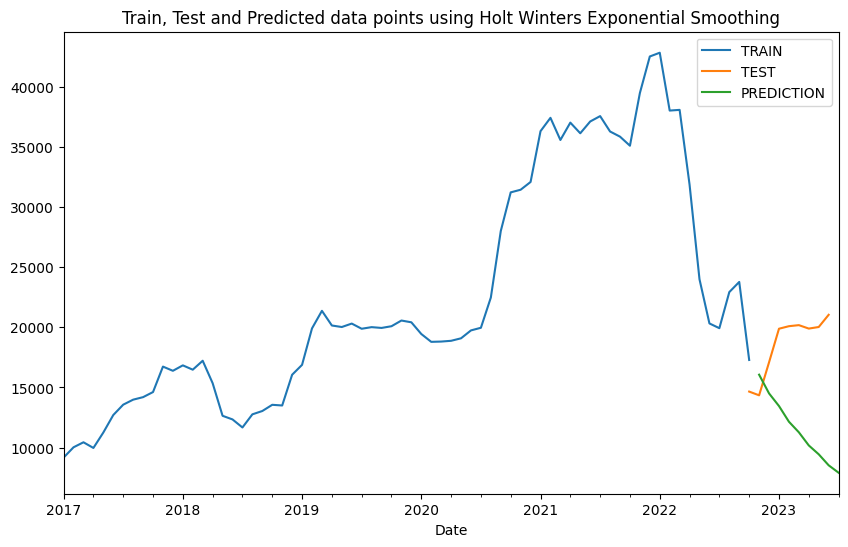

In [ ]:
#So sánh prediction với tập test để đánh giá mức độ chính xác
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))

test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

# Final Model

In [ ]:
final_train = df.resample('M').mean()

final_model = ExponentialSmoothing(endog=final_train['Price'],
                                   trend='mul',seasonal='mul',
                                   seasonal_periods=2).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
predictions = final_model.forecast(30)
predictions

2023-07-31    21826.610894
2023-08-31    22036.032560
2023-09-30    22862.679319
2023-10-31    23082.041839
2023-11-30    23947.927975
2023-12-31    24177.703224
2024-01-31    25084.691356
2024-02-29    25325.373607
2024-03-31    26275.414771
2024-04-30    26527.521758
2024-05-31    27522.659600
2024-06-30    27786.733635
2024-07-31    28829.108810
2024-08-31    29105.717946
2024-09-30    30197.572723
2024-10-31    30487.311977
2024-11-30    31630.995060
2024-12-31    31934.487695
2025-01-31    33132.459276
2025-02-28    33450.358139
2025-03-31    34705.195192
2025-04-30    35038.184120
2025-05-31    36352.585942
2025-06-30    36701.381233
2025-07-31    38078.175252
2025-08-31    38443.527203
2025-09-30    39885.675062
2025-10-31    40268.369587
2025-11-30    41778.973509
2025-12-31    42179.833829
Freq: M, dtype: float64

<Axes: title={'center': 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing'}, xlabel='Date'>

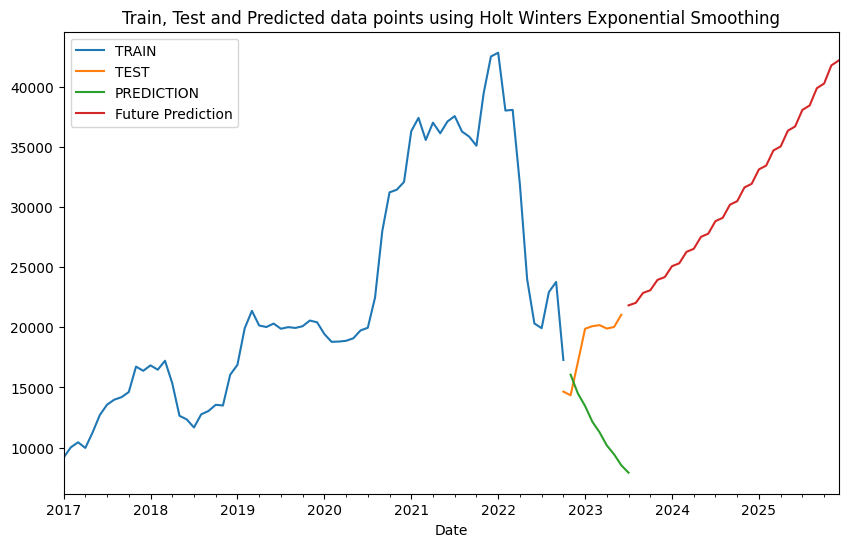

In [ ]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(10,6))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')


predictions.plot(legend=True,label='Future Prediction')